<a href="https://colab.research.google.com/github/SHAHAB-UDDIN54/Deep-learning-The-Deep-End-/blob/main/Word_Embeddings_(Word2Vec)_%E2%80%93_API_Corpus_%2B_Training_%2B_Mini_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part A — Dataset Collection (Wikipedia API)**

Concept (Simple)

Hum real text dataset API se download karte hain instead of manually copy.

Hum 4 topics lenge:

education

health

sports

technology

In [2]:
# install libraries if not installed
!pip install wikipedia pandas

import wikipedia
import pandas as pd

# avoid wikipedia disambiguation errors
wikipedia.set_lang("en")

# topics list
topics = {
    "education": ["School", "Teacher", "University", "Student", "Curriculum"],
    "health": ["Hospital", "Doctor", "Medicine", "Nutrition", "Disease"],
    "sports": ["Football", "Cricket", "Basketball", "Olympics", "Tennis"],
    "technology": ["Computer", "Artificial intelligence", "Internet", "Software", "Robotics"]
}

# empty list for storing data
data = []

# loop through categories
for category, titles in topics.items():

    # loop through article titles
    for title in titles:
        try:
            # download summary text
            text = wikipedia.summary(title)

            # append to list
            data.append([title, category, text])

        except:
            # skip if page not found
            continue

# convert to dataframe
df = pd.DataFrame(data, columns=["title","category","text"])

# save CSV
df.to_csv("wiki_dataset.csv", index=False)

# show shape
print("Dataset shape:", df.shape)

# show category distribution
print(df["category"].value_counts())

# preview data
df.head()

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=cbd5eccc6e205fd2065a2125c61708ecc82fae0e14ebb86927605da93a7907aa
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Dataset shape: (15, 3)
category
education     4
health        4
technology    4
sports        3
Name: count, dtype: int64


,title,category,text
0,School,education,"A school is an educational institution (and, i..."
1,University,education,A university (from Latin universitas 'a whole...
2,Student,education,A student is a person enrolled in a school or ...
3,Curriculum,education,"In education, a curriculum (; pl.: curriculums..."
4,Hospital,health,A hospital is a healthcare institution providi...


**Part B — Text Preprocessing**

Steps

lowercase

remove punctuation

tokenize

remove stopwords

remove short words

In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# download nltk data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab") # Add this line to download the missing resource

stop_words = set(stopwords.words("english"))

# preprocessing function
def clean_text(text):

    # convert lowercase
    text = text.lower()

    # remove punctuation
    text = re.sub(r"[^a-zA-Z ]", "", text)

    # tokenize
    tokens = word_tokenize(text)

    # remove stopwords + short words
    tokens = [w for w in tokens if w not in stop_words and len(w)>=2]

    return tokens

# show before/after examples
for i in range(3):

    print("\nOriginal:\n", df["text"][i])
    print("\nProcessed:\n", clean_text(df["text"][i]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Original:
 A school is an educational institution (and, in the case of in-person learning, the building) designed to provide learning environments for the teaching of students, usually under the direction of teachers. Most countries have systems of formal education, which is sometimes compulsory. In these systems, students progress through a series of schools that can be built and operated by both government and private organizations. The names for these schools vary by country (discussed in the Regional terms section below) but generally include primary school for young children and secondary school for teenagers who have completed primary education. An institution where higher education is taught is commonly called a university college or university.
In addition to these core schools, students in a given country may also attend schools before and after primary (elementary in the U.S.) and secondary (middle school in the U.S.) education. Kindergarten or preschool provide some schooli

**Part C — Train Word2Vec Mode**

We train:

Model       	Parameter
CBOW    	     sg=0
SkipGram	      sg=1

In [6]:
!pip install gensim
from gensim.models import Word2Vec
import time

# apply preprocessing to all documents
sentences = df["text"].apply(clean_text).tolist()

# ---------------- CBOW ----------------

start = time.time()

cbow_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    sg=0  # CBOW
)

print("CBOW Training Time:", time.time()-start)

# save model
cbow_model.save("cbow.model")


# ---------------- SkipGram ----------------

start = time.time()

sg_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    sg=1   # SkipGram
)

print("SkipGram Training Time:", time.time()-start)

# save model
sg_model.save("skipgram.model")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 68.4 MB/s eta 0:00:00
CBOW Training Time: 0.02814793586730957
SkipGram Training Time: 0.05703330039978027


**Part D — Embedding Experiments**



✅ Similar Words

In [8]:
# check top 10 similar words
words = ["school","doctor","computer","football","student"]

for w in words:
    print("\nWord:", w)
    # Check if the word exists in the model's vocabulary
    if w in cbow_model.wv.key_to_index:
        print(cbow_model.wv.most_similar(w, topn=10))
    else:
        print(f"Word '{w}' not in vocabulary.")


Word: school
[('called', 0.3392462134361267), ('aspects', 0.2572648227214813), ('rate', 0.25277626514434814), ('perform', 0.2525555193424225), ('performs', 0.2415080964565277), ('treatment', 0.23310919106006622), ('united', 0.23298625648021698), ('learning', 0.2316541075706482), ('planned', 0.2238258570432663), ('medical', 0.22221063077449799)]

Word: doctor
Word 'doctor' not in vocabulary.

Word: computer
[('addition', 0.30423322319984436), ('two', 0.2953386604785919), ('already', 0.2664995789527893), ('modern', 0.2616044878959656), ('generative', 0.2510144114494324), ('basic', 0.24384045600891113), ('student', 0.23539000749588013), ('forms', 0.23456399142742157), ('members', 0.2294909805059433), ('sports', 0.2209368646144867)]

Word: football
[('planned', 0.3817130923271179), ('bases', 0.33711954951286316), ('australia', 0.2999425530433655), ('means', 0.28393012285232544), ('applications', 0.2767065763473511), ('cricket', 0.27141687273979187), ('women', 0.2485932856798172), ('intere

**Analogy Test**

In [10]:
# analogy example
positive_words = ["woman", "king"]
negative_words = ["man"]

# Check if all words are in the vocabulary
all_words_present = True
for word_list in [positive_words, negative_words]:
    for w in word_list:
        if w not in cbow_model.wv.key_to_index:
            print(f"KeyError: Word '{w}' not present in vocabulary. Skipping analogy test.")
            all_words_present = False
            break
    if not all_words_present:
        break

if all_words_present:
    print(
        cbow_model.wv.most_similar(
            positive=positive_words,
            negative=negative_words,
            topn=5
        )
    )

KeyError: Word 'woman' not present in vocabulary. Skipping analogy test.


**Visualization (PCA 2D Plot)**

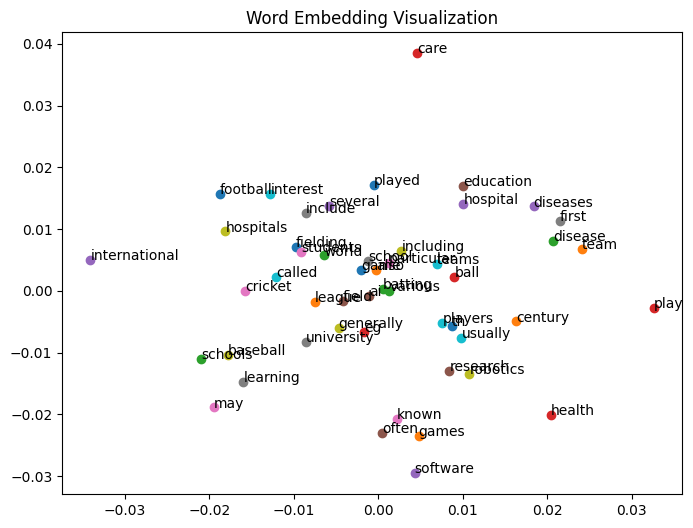

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# take 50 words
words = list(cbow_model.wv.index_to_key)[:50]

# get vectors
vectors = [cbow_model.wv[w] for w in words]

# reduce dimensions
pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

# plot
plt.figure(figsize=(8,6))

for i, word in enumerate(words):
    plt.scatter(coords[i,0], coords[i,1])
    plt.text(coords[i,0], coords[i,1], word)

plt.title("Word Embedding Visualization")
plt.show()

**Part E — Document Classification**

We convert each document → average of word vectors

✅ Create Document Vectors

In [12]:
import numpy as np

def document_vector(tokens, model):

    # keep only words in vocabulary
    tokens = [w for w in tokens if w in model.wv]

    # if no valid words
    if len(tokens)==0:
        return np.zeros(model.vector_size)

    # average vectors
    return np.mean(model.wv[tokens], axis=0)


# create document vectors
X = np.array([document_vector(clean_text(text), cbow_model) for text in df["text"]])

# labels
y = df["category"]

**Train Classifier**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# model
clf = LogisticRegression()

# train
clf.fit(X_train,y_train)

# predict
pred = clf.predict(X_test)

# accuracy
print("Accuracy:", accuracy_score(y_test,pred))

# confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test,pred))

Accuracy: 0.2

Confusion Matrix:
 [[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [2 0 0 0]]
